In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


#read data from CSV file

In [0]:
data = pd.read_csv('/content/musk_csv.csv').values

In [0]:
X = np.array(data[:,3:-1])
Y = data[:,-1]

In [0]:
### one hot encoding
temp = []
for cls in Y:
  if cls==0:
    temp.append([0,1])
  else:
    temp.append([1,0])
Y = np.array(temp)
del temp

In [0]:
feature_vector_length = len(X[0])   #### 166
num_classes = len(Y[0]) #### 2  for this data

# normalize data

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(X)
X = scaler.transform(X)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, shuffle=True)

#Model

In [8]:
model = Sequential()
model.add(Dense(300, input_shape= (feature_vector_length,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               50100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                15050     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 102       
Total params: 65,252
Trainable params: 65,252
Non-trainable params: 0
_________________________________________________________________
None


# Train Model

In [9]:
history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_test,Y_test), batch_size=1000)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 5278 samples, validate on 1320 samples
Epoch 1/50





5278/5278 [==============================] - 1s 152us/step - loss: 0.4760 - acc: 0.8208 - val_loss: 0.3844 - val_acc: 0.8462
Epoch 2/50
5278/5278 [==============================] - 0s 18us/step - loss: 0.3539 - acc: 0.8666 - val_loss: 0.3109 - val_acc: 0.8894
Epoch 3/50
5278/5278 [==============================] - 0s 17us/step - loss: 0.2869 - acc: 0.8793 - val_loss: 0.2652 - val_acc: 0.8644
Epoch 4/50
5278/5278 [==============================] - 0s 19us/step - loss: 0.2430 - acc: 0.8962 - val_loss: 0.2186 - val_acc: 0.9197
Epoch 5/50
5278/5278 [==============================] - 0s 18us/step - loss: 0.2058 - acc: 0.9286 - val_loss: 0.1904 - val_acc: 0.9311
Epoch 6/50
5278/5278 [==============================] - 0s 18us/step - loss: 0.1794 - acc: 0.9362 - val_loss: 0.1706 - val_acc: 0.9333
Epoch 7/50
5278/5278 [=================

# plot accuracy curves

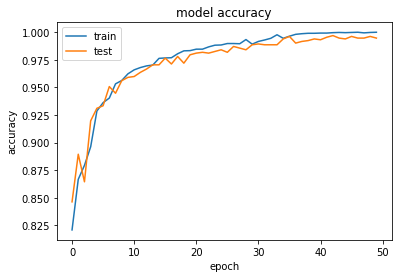

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.savefig('Accuracy.png')
plt.show()

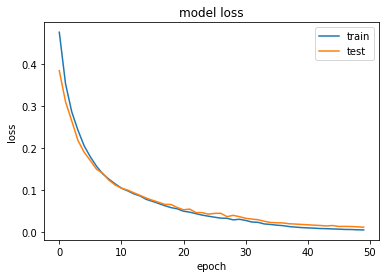

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.savefig('loss.png')
plt.show()

In [12]:
from sklearn.metrics import classification_report

Y_pred = model.predict(X_test, batch_size=64, verbose=1)
Y_pred_bool = np.argmax(Y_pred, axis=1)

print(classification_report(np.argmax(Y_test,axis=1), Y_pred_bool))

1320/1320 [==============================] - 0s 42us/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       203
           1       1.00      1.00      1.00      1117

    accuracy                           0.99      1320
   macro avg       0.99      0.99      0.99      1320
weighted avg       0.99      0.99      0.99      1320



In [0]:
model.save('model.h5')